In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#쥬피터노트북 안에 그래프 기리기 위해 
%matplotlib inline 

#그래프에서 격자 추가 
plt.style.use('ggplot')

#그래프 마이너스 폰트 깨지는 문제에 대한 대처

mpl.rcParams['axes.unicode_minus'] = False


In [34]:
#케글에서 받은 훈련데이터 읽어오기

train = pd.read_csv('C:/Users/82103/Desktop/Python/project/kaggle_공유자전거수요/train.csv', parse_dates=['datetime']) 
# train.head()
# train.shape
# train.columns
# train.dtypes
# train.info
# train.head(20)
# train.temp.describe()
# train.isnull().sum()

In [33]:
train["year"] = train['datetime'].dt.year
train["month"] = train['datetime'].dt.month
train["day"] = train['datetime'].dt.day
train["hour"] = train['datetime'].dt.hour
train["minute"] = train['datetime'].dt.minute
train["second"] = train['datetime'].dt.second

# train.shape
# train.head()

In [35]:
from IPython.display import set_matplotlib_formats

## Windows의 한글 폰트 설정
plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

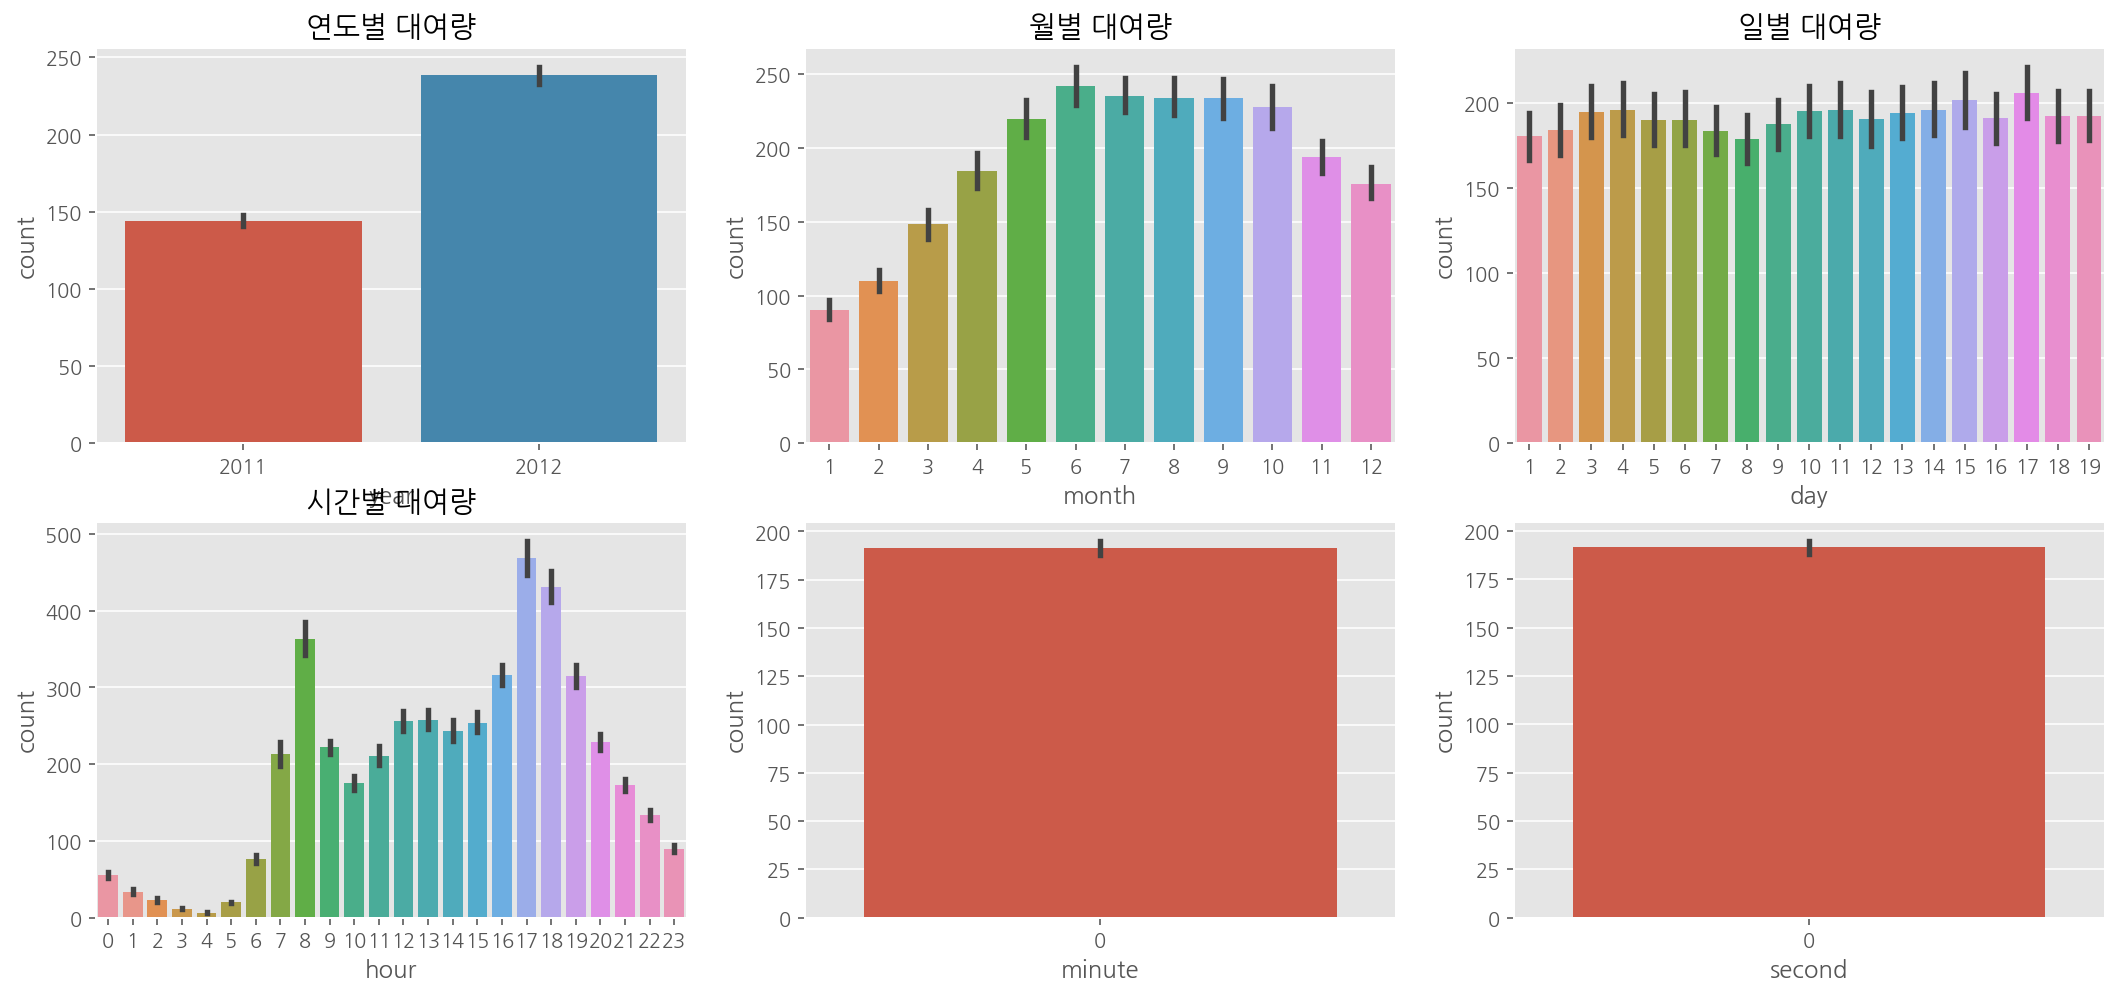

In [6]:
figure,((ax1, ax2,ax3),(ax4, ax5,ax6) ) = plt.subplots(nrows = 2 , ncols = 3)
figure.set_size_inches(18,8)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel= 'count', title='연도별 대여량')
ax2.set(xlabel= 'month', title='월별 대여량')
ax3.set(xlabel= 'day', title='일별 대여량')
ax4.set(xlabel= 'hour', title='시간별 대여량')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

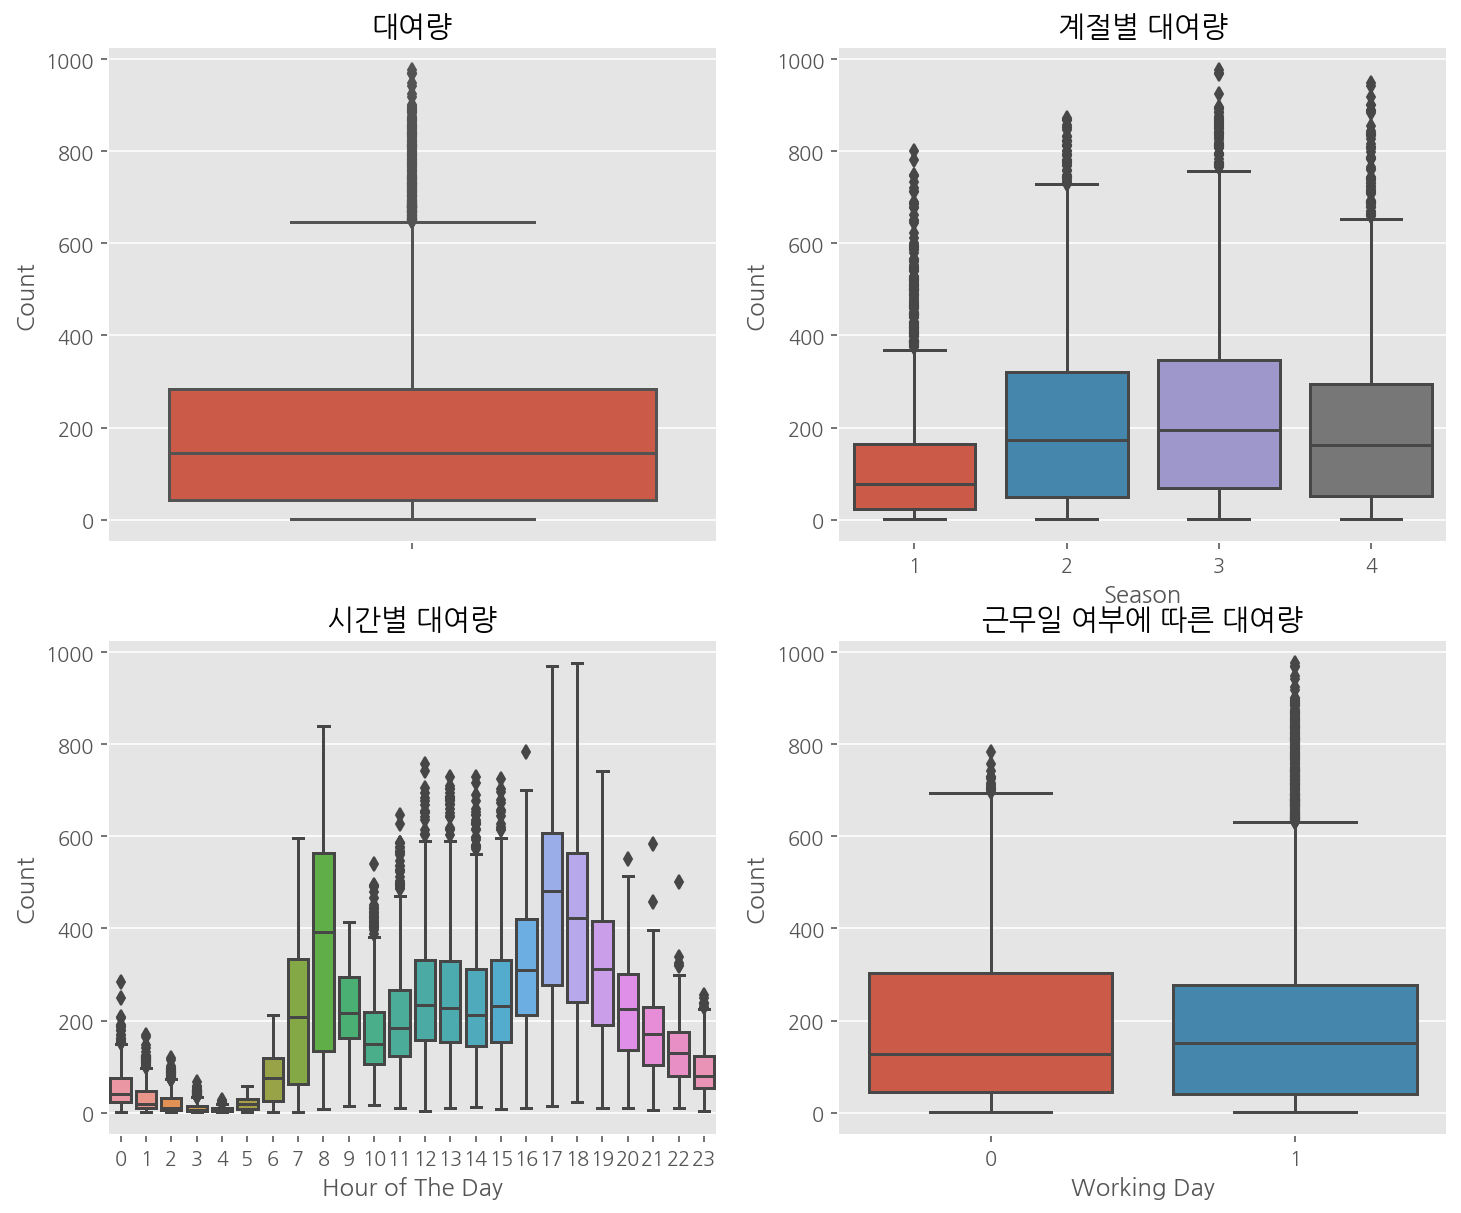

In [20]:
#subplots의 row와 col 선언을 통해 n*m개의 그래프 제작 , set_size_inches로 크기 조절
fig, axes = plt.subplots(nrows = 2 , ncols=2 )       
fig.set_size_inches(12,10)

#axes를 통해 각 boxplot의 위치 지정 
sns.boxplot(data=train, y = 'count', orient= 'v' , ax=axes[0][0])
sns.boxplot(data=train, y = 'count', x= 'season' ,orient= 'v', ax=axes[0][1])
sns.boxplot(data=train, y = 'count',x= 'hour', orient= 'v' , ax=axes[1][0])
sns.boxplot(data=train, y = 'count', x= 'workingday',orient= 'v' , ax=axes[1][1])

#라벨링
axes[0][0].set(ylabel='Count', title ='대여량')
axes[0][1].set(xlabel='Season',ylabel= 'Count', title ='계절별 대여량')
axes[1][0].set(xlabel='Hour of The Day', ylabel= 'Count', title ='시간별 대여량')
axes[1][1].set(xlabel='Working Day', ylabel= 'Count', title ='근무일 여부에 따른 대여량')

In [22]:
#평일을 나누어서 계산
train['dayofweek']= train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [23]:
train['dayofweek'].value_counts() 

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

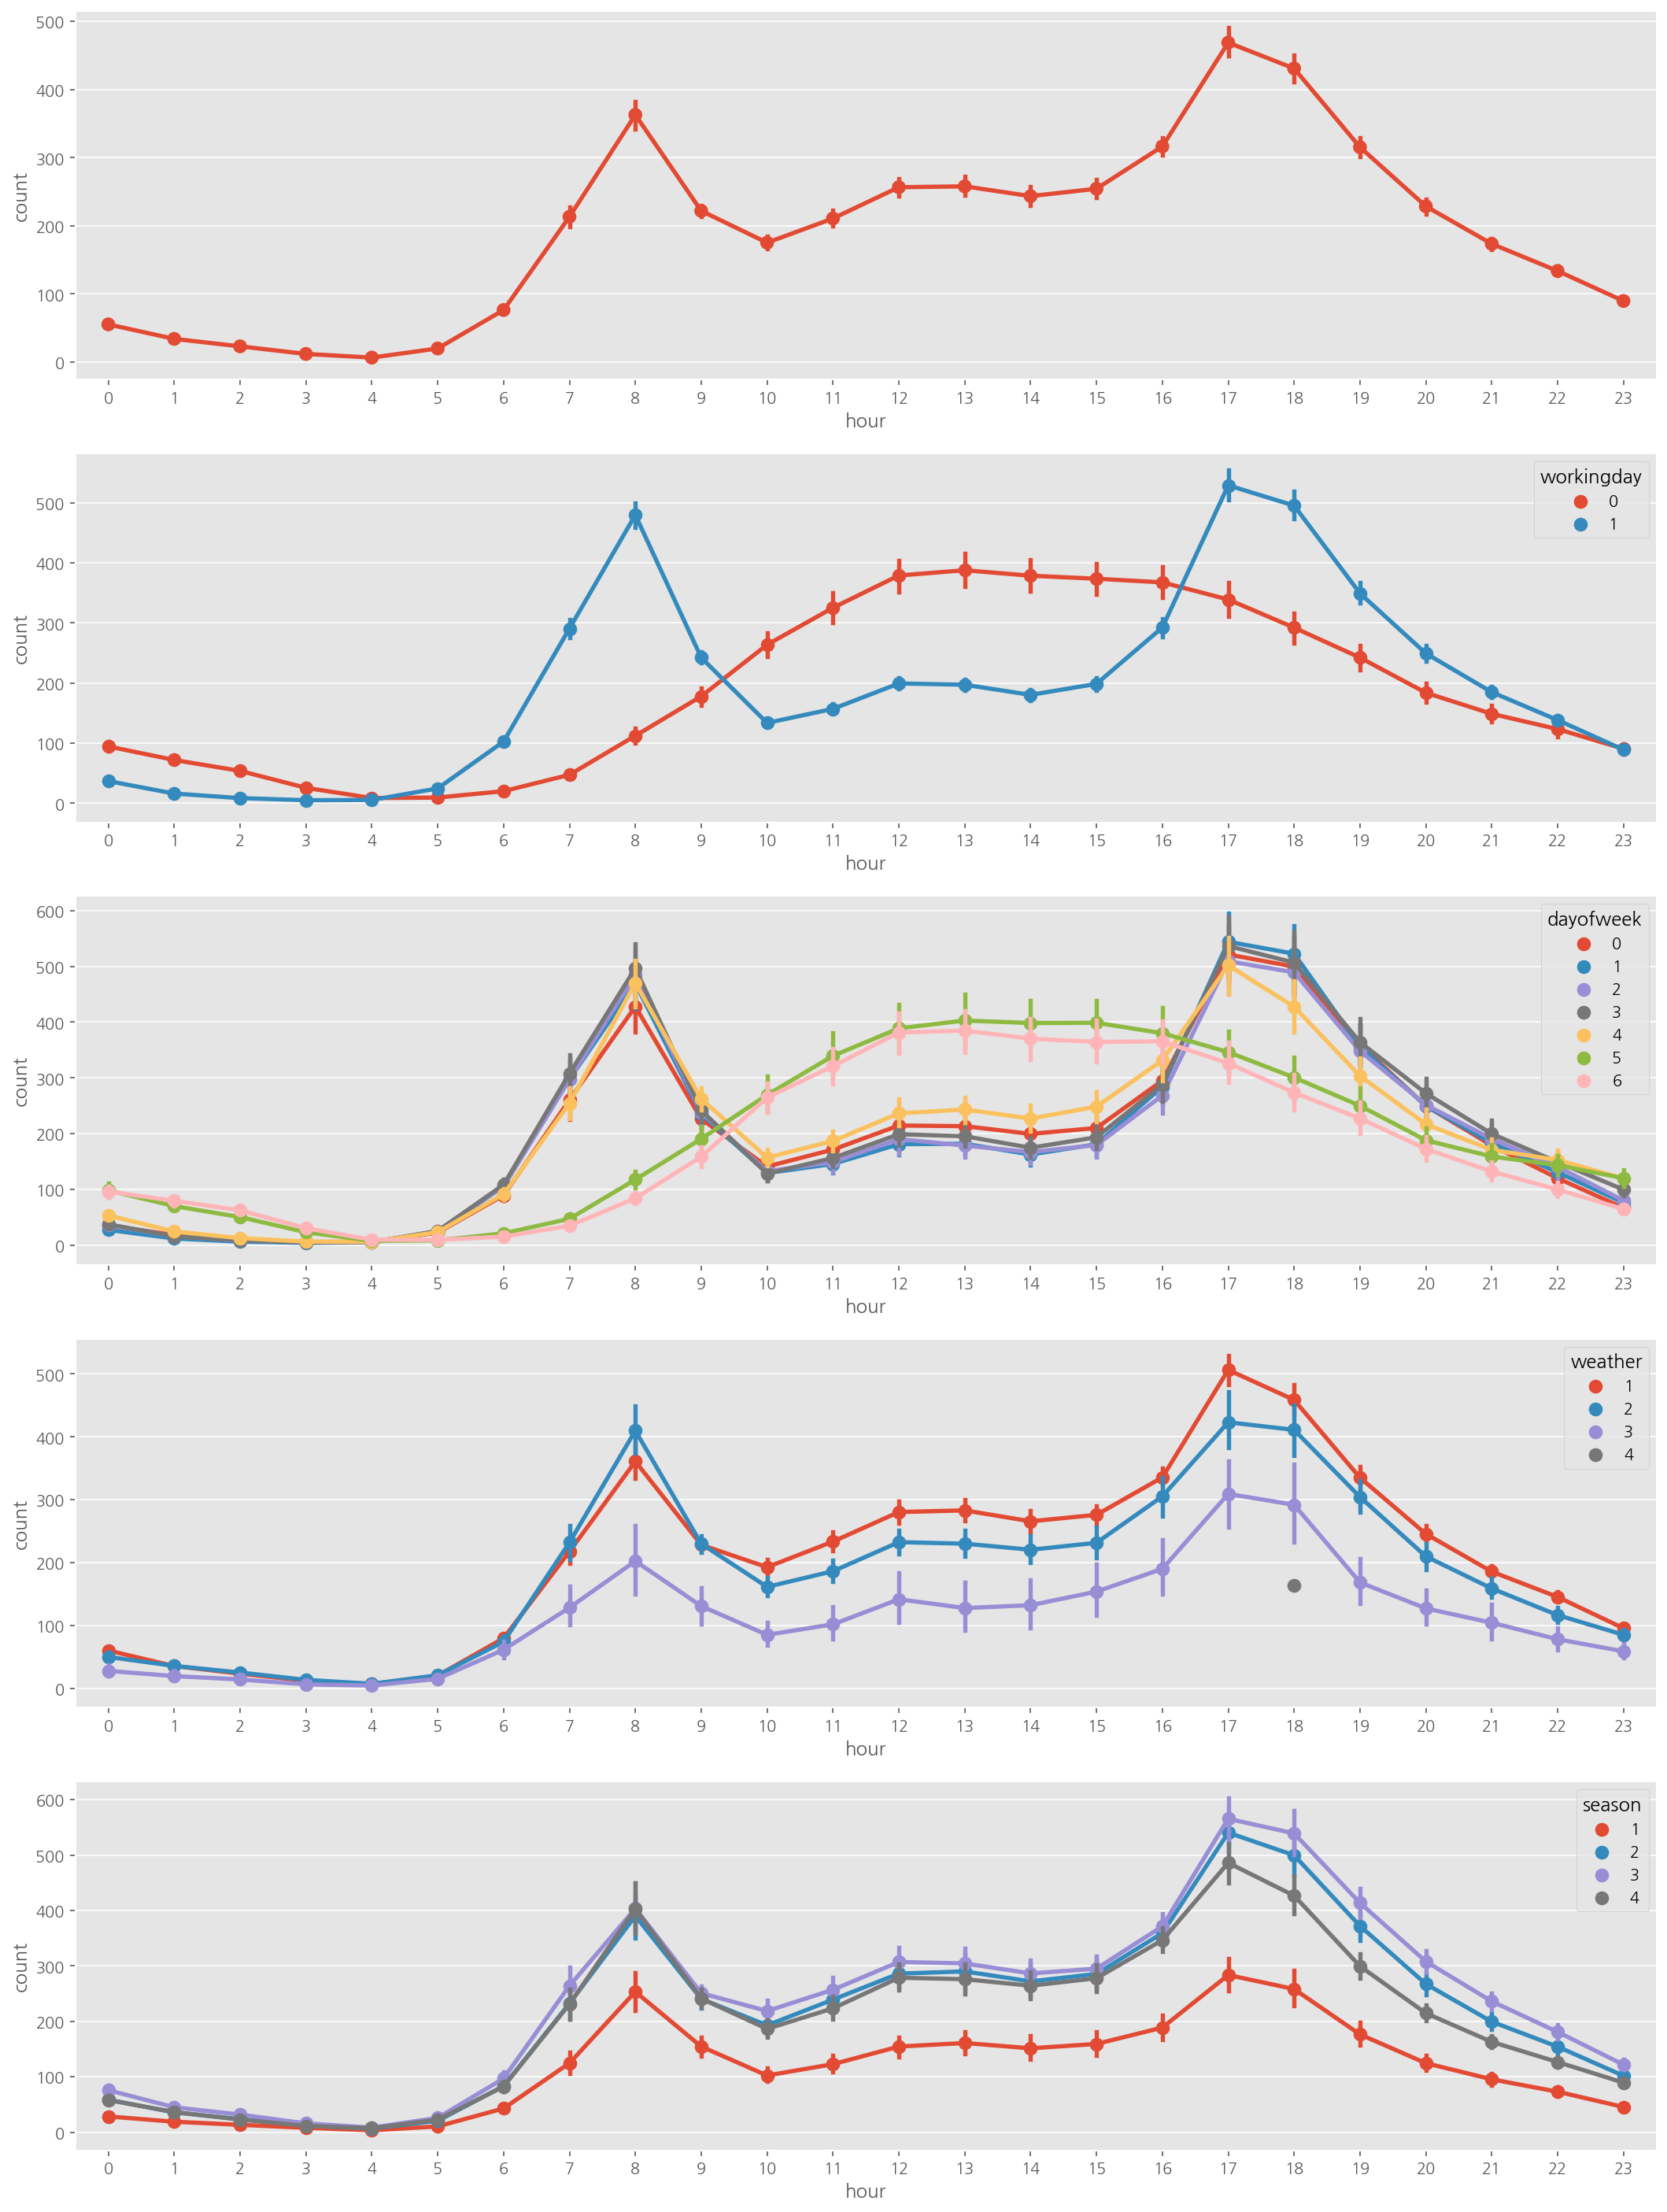

In [27]:
#5개의 표 만들기 위해서 세팅
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

#5개의 pointplot으로 시각화 , x축은 시간 y축은  hue column 조건의 갯수, 
sns.pointplot(data = train, x='hour', y='count', ax= ax1)
sns.pointplot(data = train, x='hour', y='count', hue = 'workingday',ax= ax2)
sns.pointplot(data = train, x='hour', y='count', hue = 'dayofweek',ax= ax3)
sns.pointplot(data = train, x='hour', y='count', hue = 'weather',ax= ax4)
sns.pointplot(data = train, x='hour', y='count', hue = 'season',ax= ax5)

In [29]:
corrMatt = train[["temp", 'atemp','casual','registered', 'humidity','windspeed','count']]
corrMatt = corrMatt.corr()

print(corrMatt)


#상관관계 계산 

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] 

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


array([ 1.        ,  0.98494811,  1.        ,  0.46709706,  0.46206654,
        1.        ,  0.31857128,  0.31463539,  0.49724969,  1.        ,
       -0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
       -0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
        1.        ,  0.39445364,  0.38978444,  0.69041357,  0.97094811,
       -0.31737148,  0.10136947,  1.        ])

### 상관관계
### 상관관계는 1일수록 매우 관련이 있고, 0이면 관계가 없음, -1이면 반대관계이다.

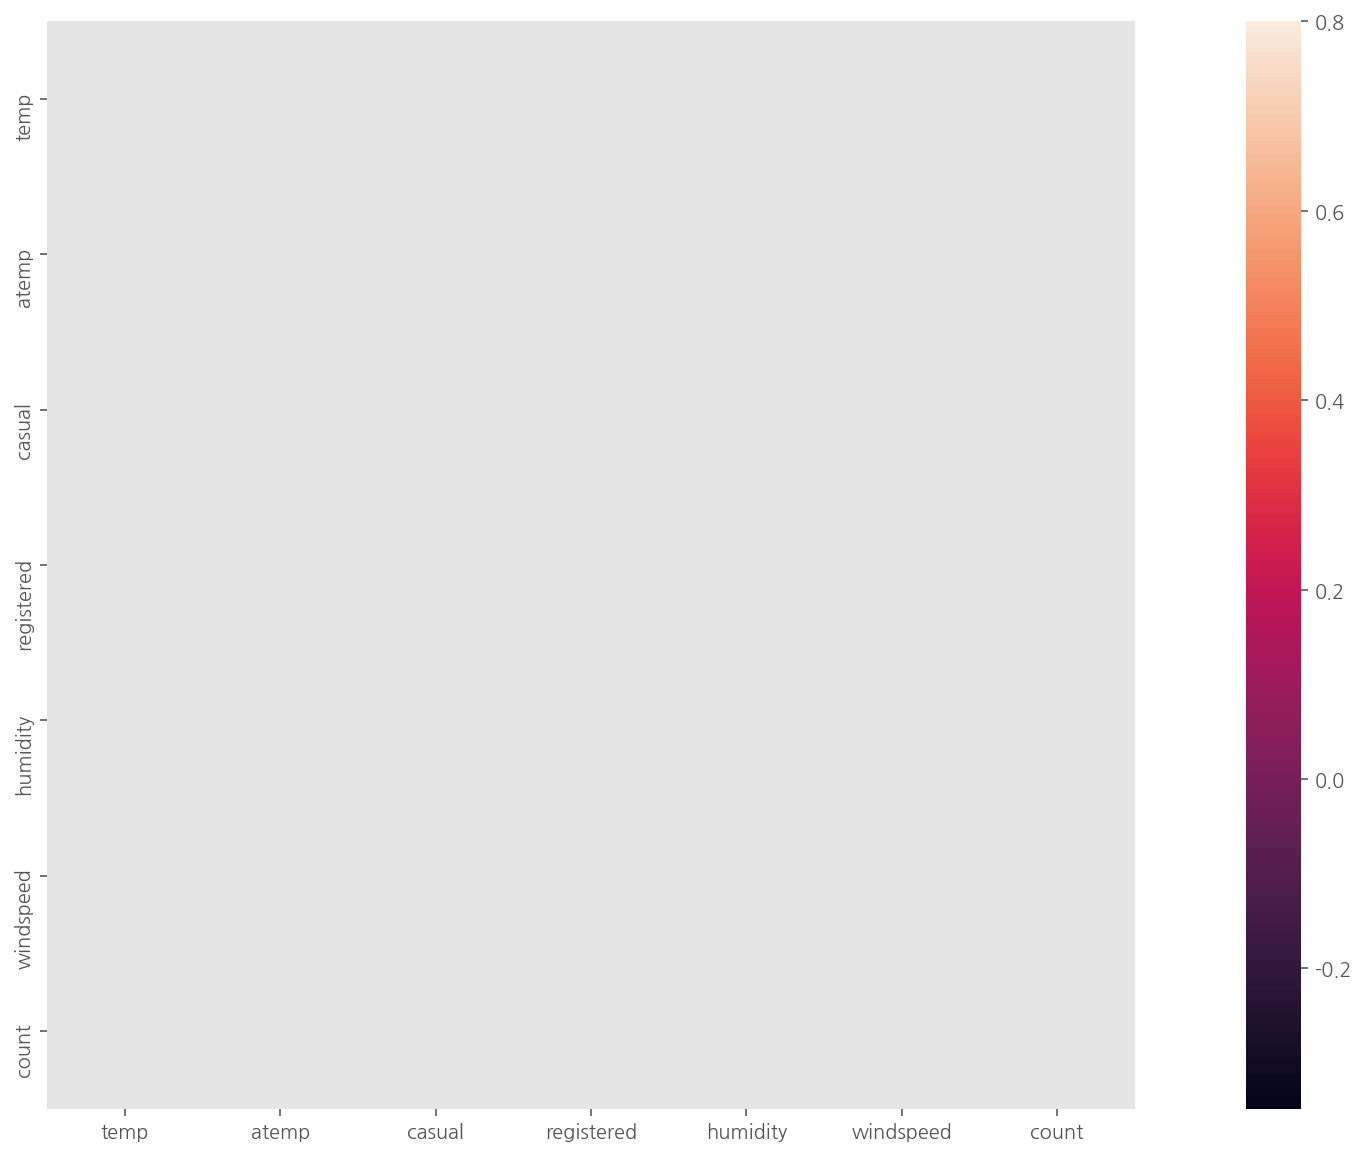

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask , vmax=.8,square=True, annot = True)

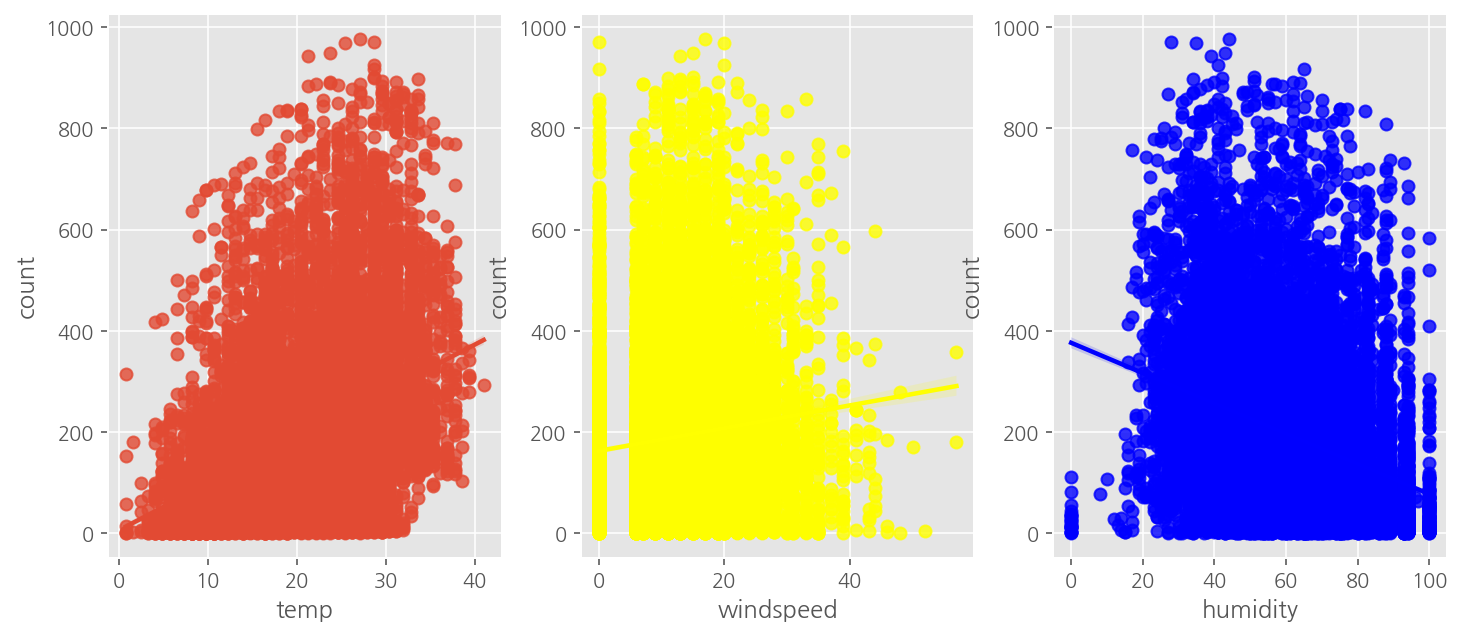

In [42]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(x = 'temp', y='count', data=train,ax = ax1)
sns.regplot(x = 'windspeed', y='count', data=train,ax = ax2, color ='yellow')
sns.regplot(x = 'humidity', y='count', data=train,ax = ax3, color= 'blue')

In [48]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)

train[['datetime','year_month']].head()

(10886, 13)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)



sns.barplot(data=train, x="year_month", y="count", ax=ax3)

In [55]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 13)
(10739, 13)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229774, 4.562423868087808, 0.9581176780909615))

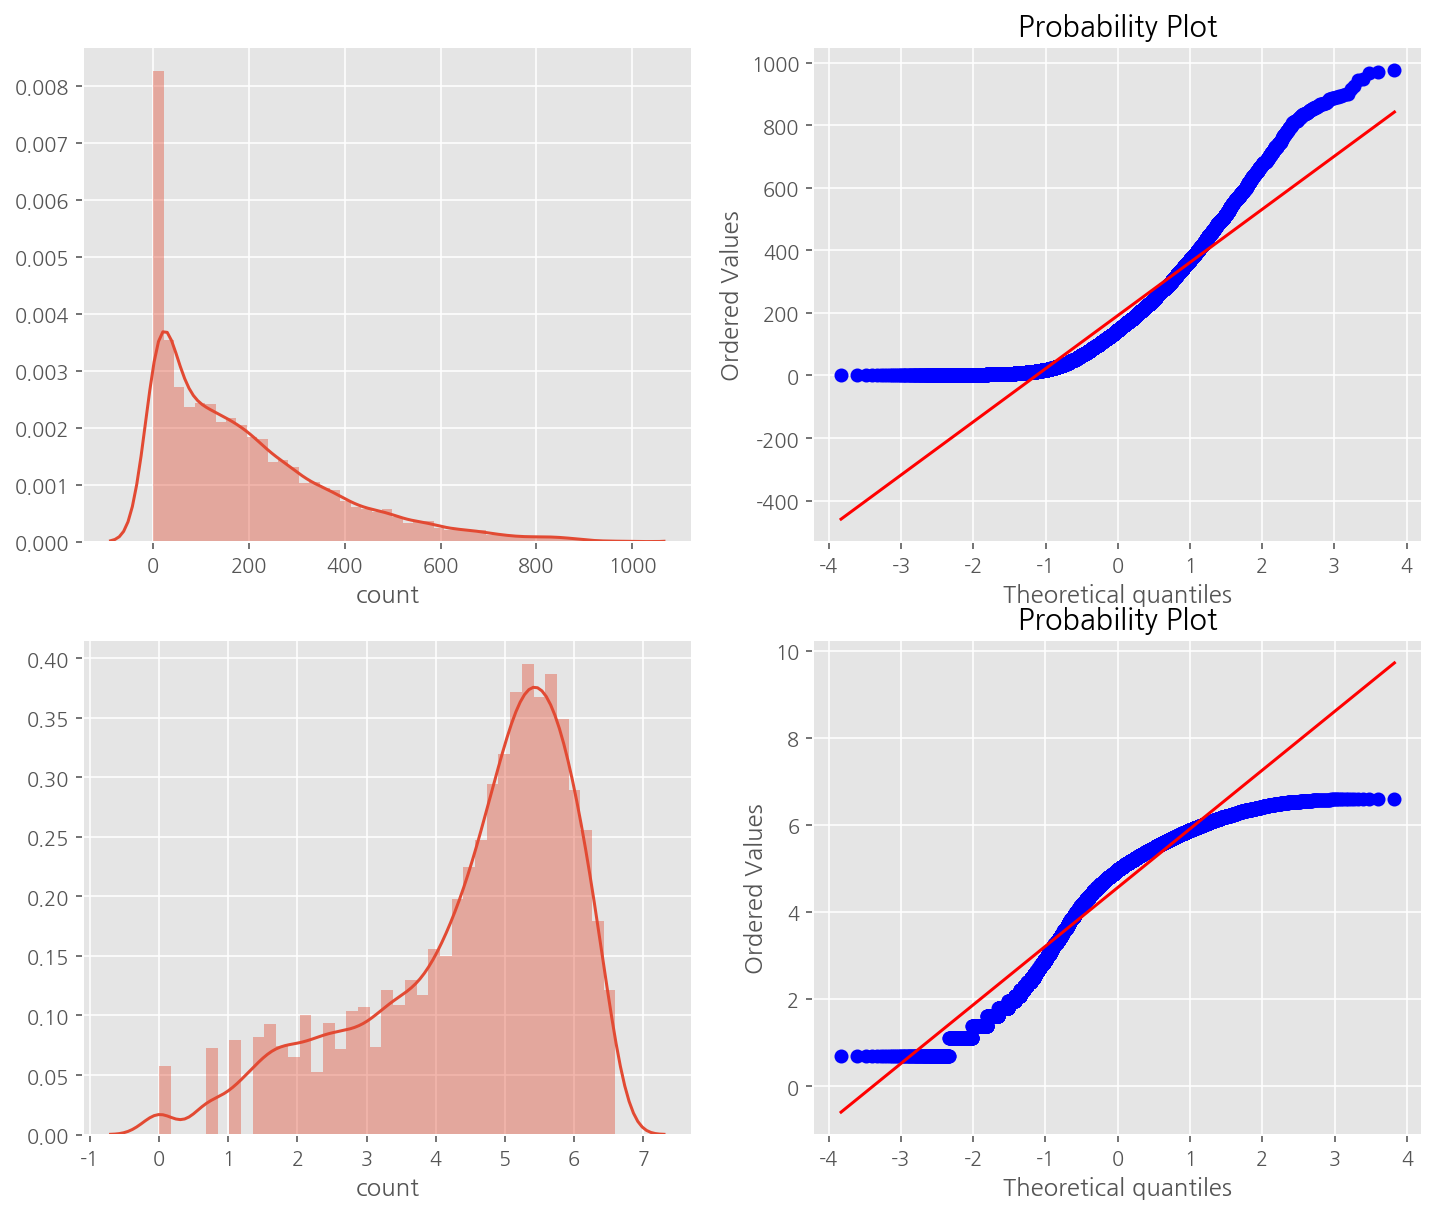

In [56]:
# count값의 데이터 분포도를 파악
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])